In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import csv
from sklearn import cluster
import numpy as np
import seaborn as sns
sns.set(style="whitegrid")

/Users/geraintianpalmer/Documents/DetectingDeadlockInQingNetworkSimulation/venv/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
bound_data = []
file_name = 'data_for_graphs/ratio_data.csv'
data_file = open(file_name, 'r')
rdr = csv.reader(data_file)
for row in rdr:
    bound_data.append([float(obs) for obs in row])

In [5]:
strange = [obs for obs in bound_data if len(obs)!=14]
bound_data = [obs for obs in bound_data if obs not in strange]

In [6]:
p3s = [row[-2] for row in bound_data]
print len(p3s)
print max(p3s)
print min(p3s)

7079785
0.614284948191
1.12555199823e-07


In [26]:
p3s_boundaries = [0.0, 0.13, 0.26, 0.39, 0.52, 0.65]
ratios_p3s = [[row[-1] for row in bound_data if row[-2] > p3s_boundaries[i] and row[-2] <= p3s_boundaries[i+1]] for i in range(5)]

In [27]:
ratios_p3s[0][:10]

[0.18470274305276274,
 0.19418422165237453,
 0.22095475267607897,
 0.2816820276497696,
 0.2391783975634907,
 0.2078977932636469,
 0.19816624668453317,
 0.1875185063332785,
 0.2026980736680906,
 0.2856359649122807]

In [28]:
[len(row) for row in ratios_p3s]

[5213547, 1290086, 432556, 130398, 13198]

In [29]:
meansv = [sum(row)/len(row) for row in ratios_p3s]
means = [str(round(m, 4)) for m in meansv]

In [46]:
labs = [str(p3s_boundaries[i]) + ' < ' + r"$p_{(-3)}$" + ' < ' + str(p3s_boundaries[i+1]) + ', ' + r"$\mathbb{E}[E]$" + ' = ' + means[i] for i in range(len(means))]

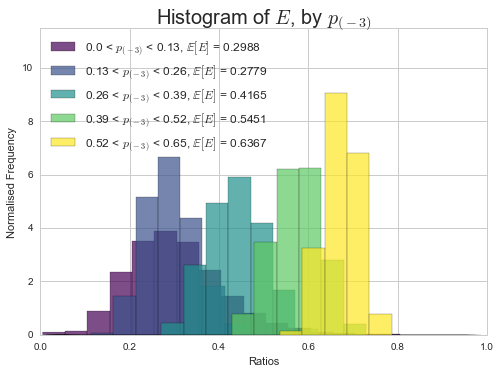

In [52]:
colormap = plt.cm.viridis
bins = [i/20.0 for i in range(20)]
width = 1.0/20.0

fig, ax = plt.subplots()
plt.gca().set_color_cycle([colormap(i) for i in np.linspace(0, 1, len(ratios_p3s))])
plt.hist(ratios_p3s, bins=bins, width=width, alpha=0.7, stacked=False, label=labs, normed=True)
plt.xlabel('Ratios')
plt.ylabel('Normalised Frequency')
plt.legend(fontsize=12, loc='best')
ax.set_title('Histogram of ' + r"$E$" + ', by ' + r"$p_{(-3)}$", fontsize=20)
ax.set_ylim([0,11.5])
plt.show()